# Classification Model for Marketing Dataset|

UCCD2063 Artificial Intelligence Technique
<br></br>
Completed By:
- See Ling Xuan 1901373 P1

## Index

1. [Import Python Libraries](#Import-Python-Libraries)
2. [Data Collection](#Data-Collection)
3. [Data Exploration](#Data-Exploration)
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Declare Functions](#Training-Operation-Process-Functions)
7. [Model Training](#Model-Training)
8. [Fine Tune Model](#Fine-Tune-Model)
9. [Testing the Model](#Testing-the-Model)
10. [Conclusion](#Conclusion)
---

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.mode.chained_assignment = None #turn off warning for SettingWithCopyWarning

---

# Data Collection

In [2]:
data = pd.read_csv("DataSet.csv", na_values = "?")

---

# Data Exploration

In [3]:
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
# Number of null record per each feature
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

In [5]:
# Shape of dataset
print("Number of Features: ", data.shape[1])
print("Number of Instances: ", data.shape[0])

Number of Features:  17
Number of Instances:  45211


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      45211 non-null  int64 
 1   X2      45211 non-null  object
 2   X3      45211 non-null  object
 3   X4      45211 non-null  object
 4   X5      45211 non-null  object
 5   X6      45211 non-null  int64 
 6   X7      45211 non-null  object
 7   X8      45211 non-null  object
 8   X9      45211 non-null  object
 9   X10     45211 non-null  int64 
 10  X11     45211 non-null  object
 11  X12     45211 non-null  int64 
 12  X13     45211 non-null  int64 
 13  X14     45211 non-null  int64 
 14  X15     45211 non-null  int64 
 15  X16     45211 non-null  object
 16  y       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# Size of output y
data.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [13]:
# Features of data
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'y'],
      dtype='object')

## Numerical Features Analysis

In [14]:
data.describe()

,X1,X6,X10,X12,X13,X14,X15
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


There are totally 7 features of numerical type in this dataset including features 'X1', 'X6', 'X10', 'X12', 'X13', 'X14', 'X15'.

### Data Skewness

In [15]:
# Overview to data skewness
X1skewness = data.X1.skew(axis = 0, skipna = True)
X6skewness = data.X6.skew(axis = 0, skipna = True)
X10skewness = data.X10.skew(axis = 0, skipna = True)
X12skewness = data.X12.skew(axis = 0, skipna = True)
X13skewness = data.X13.skew(axis = 0, skipna = True)
X14skewness = data.X14.skew(axis = 0, skipna = True)
X15skewness = data.X15.skew(axis = 0, skipna = True)

print('X1 skewness: ', X1skewness)
print('X6 skewness: ', X6skewness)
print('X10 skewness: ', X10skewness)
print('X12 skewness: ', X12skewness)
print('X13 skewness: ', X13skewness)
print('X14 skewness: ', X14skewness)
print('X15 skewness: ', X15skewness)

X1 skewness:  0.6848179257252598
X6 skewness:  8.360308326166326
X10 skewness:  0.09307901402122411
X12 skewness:  3.144318099423456
X13 skewness:  4.898650166179674
X14 skewness:  2.6157154736563477
X15 skewness:  41.84645447266292


From the result, we can see that all numerical features are positively skewed (skewed to the right) by having the skew value of >0. However, the feature 'X10' considered as no skewness due to the too low value. Most of the features are slightly positively skewed while the feature 'X15' have the highest skewness up to 41.85 to the right. As the data skewness can lower the model's performance, the data skewness can then be pre-processed by using normalization technique.

Next, we use seaborn to observe the skewness of each numerical feature.

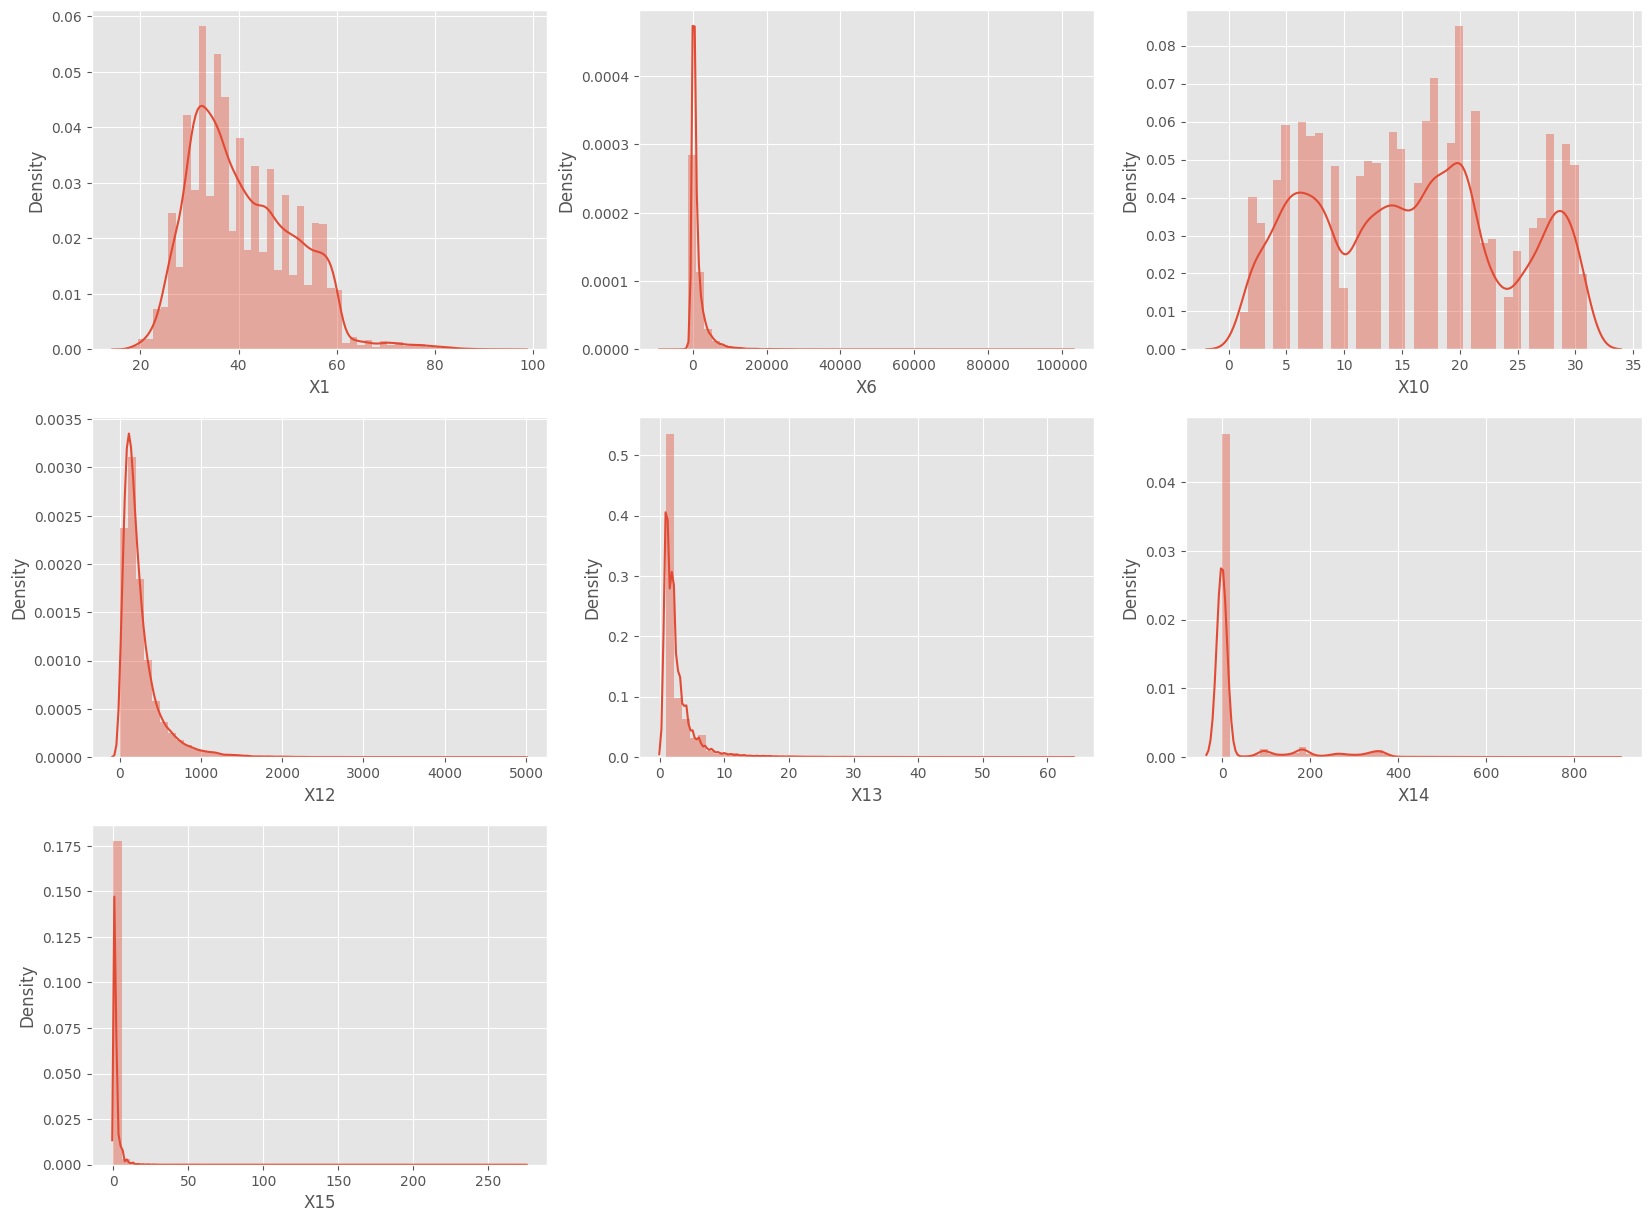

In [62]:
plt.style.use("ggplot") # Beautify purpose
figure, axes = plt.subplots(3,3,figsize=(20,15))
# plt.subplots_adjust(wspace=1, hspace=1)

sns.distplot(data.X1, ax=axes[0][0])
sns.distplot(data.X6, ax=axes[0][1])
sns.distplot(data.X10, ax=axes[0][2])
sns.distplot(data.X12, ax=axes[1][0])
sns.distplot(data.X13, ax=axes[1][1])
sns.distplot(data.X14, ax=axes[1][2])
sns.distplot(data.X15, ax=axes[2][0])

# sns.histplot(data=data, x='X1', kde=True, stat='density', linewidth=0, ax=axes[0][0])       
# sns.histplot(data=data, x='X6', kde=True, stat='density', linewidth=0, ax=axes[0][1])       
# sns.histplot(data=data, x='X10', kde=True, stat='density', linewidth=0, ax=axes[0][2])       
# sns.histplot(data=data, x='X12', kde=True, stat='density', linewidth=0, ax=axes[1][0])       
# sns.histplot(data=data, x='X13', kde=True, stat='density', linewidth=0, ax=axes[1][1])       
# sns.histplot(data=data, x='X14', kde=True, stat='density', linewidth=0, ax=axes[1][2])       
# sns.histplot(data=data, x='X15', kde=True, stat='density', linewidth=0, ax=axes[2][0]) 

# Hide unused subplot
axes[2][1].set_frame_on(False)
axes[2][1].set_axis_off()
axes[2][2].set_frame_on(False)
axes[2][2].set_axis_off()

plt.show()

## Categorical Features Analysis

In [65]:
cat_data = data.select_dtypes(include= object)
cat_data.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Remove Output Vector

We remove the output vector of "y" for now and will then add it to the training and test set.

In [66]:
ori_data = data.copy() # Keep the original dataset
cat_data.drop('y', axis=1, inplace=True)
cat_data.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [68]:
# Number of unique values for each categorical feature
cat_data.select_dtypes('object').nunique()

X2     12
X3      3
X4      4
X5      2
X7      2
X8      2
X9      3
X11    12
X16     4
dtype: int64

In [70]:
# Details of each unique value for each categorical feature
for col in cat_data.columns:
        print(col,":")
        print(cat_data[col].value_counts(), "\n")

X2 :
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: X2, dtype: int64 

X3 :
married     27214
single      12790
divorced     5207
Name: X3, dtype: int64 

X4 :
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: X4, dtype: int64 

X5 :
no     44396
yes      815
Name: X5, dtype: int64 

X7 :
yes    25130
no     20081
Name: X7, dtype: int64 

X8 :
no     37967
yes     7244
Name: X8, dtype: int64 

X9 :
cellular     29285
unknown      13020
telephone     2906
Name: X9, dtype: int64 

X11 :
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: X11, dtype: int64 

X16 :
unknown    36959
failure     4901
other       1840
success     1511

We observe there is **unknown** value for several categorical features in this dataset. The unknown value will be assumed as null value existed in the dataset and will be processed in the further data pre-processing step.
<br></br>
From observing the categorical data, we can see that most of them are nominal features in this dataset. For nominal features, we can simply use one hot encoding as the order of it is not important. However, since the feature **'X4'** has ranks of primary, secondary, and tertiary, it considered as ordinal feature and require ordinal encoding in the pre-processing step.

Next, we provide an overview to the categorical features visualization.

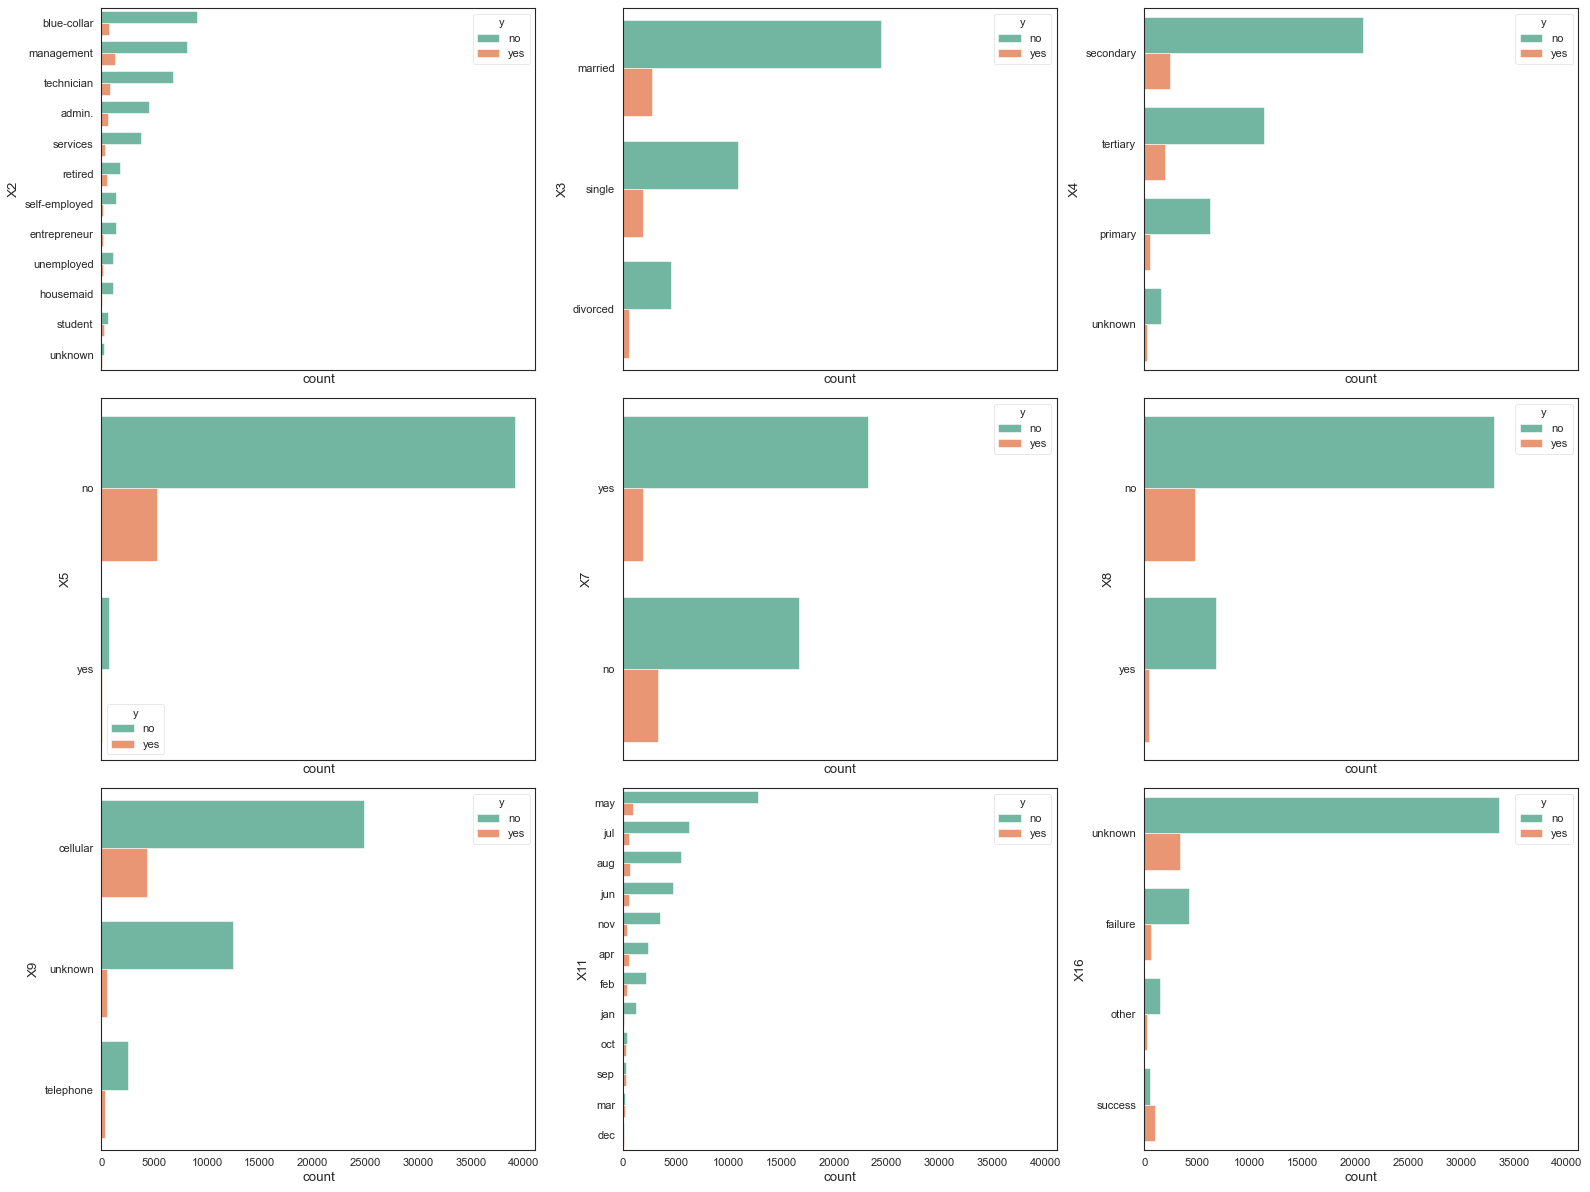

In [90]:
df = cat_data

figure, axes = plt.subplots(3,3,figsize=(20,15), dpi=80, sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, df):
    sns.countplot(y=col, hue='y', data=data, ax=ax, order = df[col].value_counts().index, palette='Set2')

plt.tight_layout()  
plt.show()

From above visualization, we can gain an insight that all categorical features have quite a good correlation with the output vector 'y'.

Next, the data visualization of this dataset will be depicted by using matplotlib and seaborn to visualize data in several graphs and tables form.

---

# Data Visualization

## Correlation

1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [91]:
data.corr()

,X1,X6,X10,X12,X13,X14,X15
X1,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
X6,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
X10,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
X12,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
X13,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
X14,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
X15,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

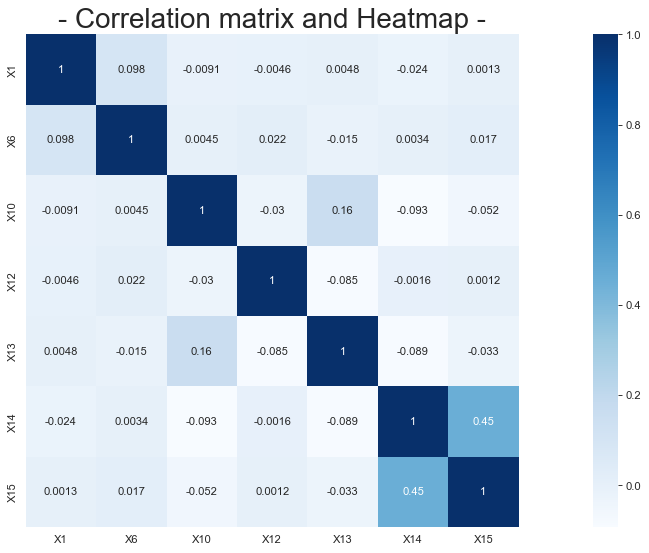

In [94]:
plt.figure(figsize =(24,8), dpi=80)
corrmat = data.corr()
sns.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

From the correlation diagram, most of the features do not have strong correlation between each other. Features 'X14' and 'X15' are the features combination that have the strongest positive correlation but the correlation value of 0.45 which do not more than 0.70 is considered in the acceptable range. Therefore, the features should be retained.

The below 10 graphs visualize the data in different form.

### Relationship between 

In [96]:
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
